# **Exploratory Data Analysis**

---
---

**Data dictionary & problem description:**

Problem: predicting, based on measurements of contaminants collected over a year, whether it may be harmful to health or not.

- DATE. Date recorded at the time of taking pollutant values (numeric)
- N_CCAA. Name of each autonomous community in Spain where measurement data for each pollutant has been collected (categorical)
- PROVINCE. Name of each province where measurement data for each pollutant has been collected (categorical)
- N_MUNICIPALITY. Name of each municipality where measurement data for each pollutant has been collected (categorical)
- STATION. Number assigned to each station of each autonomous community that has recorded pollutant measurement data (numeric)
- MAGNITUDE. Each pollutant that has been recorded in the different stations (categorical)
- LATITUDE LONGITUDE. Geographic data of each station where the pollutants have been recorded (numeric)
- H01, H02, H03... H24. Recorded value per hour of each pollutant. All contaminants have been taken with unified measurement units (µg/m3)(numeric) 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import zipfile

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
clean_df = pd.read_csv('../data/processed/clean_pollutants.csv')
clean_df.head()

,FECHA,N_CCAA,PROVINCIA,N_MUNICIPIO,ESTACION,MAGNITUD,LATITUD,LONGITUD,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
0,2022-01-04,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.16,0.16,0.18,0.18,0.14,0.15,0.22,0.18,0.16,0.18,0.18,0.13,0.17,0.11,0.17,0.18,0.19,0.25,0.25,0.28,0.25,0.20,0.20,0.22
1,2022-01-05,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.23,0.26,0.22,0.20,0.21,0.23,0.28,0.31,0.34,0.40,0.35,0.29,0.27,0.30,0.48,0.33,0.45,0.58,0.57,0.51,0.51,0.51,0.48,0.41
2,2022-01-06,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.36,0.31,0.32,0.33,0.32,0.33,0.33,0.37,0.54,0.45,0.37,0.32,0.30,0.28,0.30,0.26,0.29,0.36,0.43,0.32,0.32,0.30,0.30,0.28
3,2022-01-07,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.25,0.24,0.25,0.26,0.32,0.32,0.28,0.25,0.30,0.27,0.30,0.39,0.28,0.23,0.28,0.29,0.28,0.32,0.31,0.23,0.25,0.29,0.29,0.28
4,2022-01-08,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.25,0.25,0.23,0.23,0.32,0.29,0.23,0.28,0.55,0.34,0.36,0.28,0.27,0.27,0.25,0.20,0.23,0.25,0.25,0.23,0.20,0.22,0.22,0.19


In [5]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719282 entries, 0 to 719281
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   FECHA        719282 non-null  object 
 1   N_CCAA       718259 non-null  object 
 2   PROVINCIA    719282 non-null  object 
 3   N_MUNICIPIO  718259 non-null  object 
 4   ESTACION     719282 non-null  int64  
 5   MAGNITUD     719282 non-null  object 
 6   LATITUD      715747 non-null  float64
 7   LONGITUD     715747 non-null  float64
 8   H01          719282 non-null  float64
 9   H02          719282 non-null  float64
 10  H03          719282 non-null  float64
 11  H04          719282 non-null  float64
 12  H05          719282 non-null  float64
 13  H06          719282 non-null  float64
 14  H07          719282 non-null  float64
 15  H08          719282 non-null  float64
 16  H09          719282 non-null  float64
 17  H10          719282 non-null  float64
 18  H11          719282 non-

In [6]:
if clean_df.duplicated().sum():
    clean_df = clean_df.drop_duplicates()
print(clean_df.shape)
clean_df.head()

(719282, 32)


,FECHA,N_CCAA,PROVINCIA,N_MUNICIPIO,ESTACION,MAGNITUD,LATITUD,LONGITUD,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
0,2022-01-04,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.16,0.16,0.18,0.18,0.14,0.15,0.22,0.18,0.16,0.18,0.18,0.13,0.17,0.11,0.17,0.18,0.19,0.25,0.25,0.28,0.25,0.20,0.20,0.22
1,2022-01-05,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.23,0.26,0.22,0.20,0.21,0.23,0.28,0.31,0.34,0.40,0.35,0.29,0.27,0.30,0.48,0.33,0.45,0.58,0.57,0.51,0.51,0.51,0.48,0.41
2,2022-01-06,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.36,0.31,0.32,0.33,0.32,0.33,0.33,0.37,0.54,0.45,0.37,0.32,0.30,0.28,0.30,0.26,0.29,0.36,0.43,0.32,0.32,0.30,0.30,0.28
3,2022-01-07,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.25,0.24,0.25,0.26,0.32,0.32,0.28,0.25,0.30,0.27,0.30,0.39,0.28,0.23,0.28,0.29,0.28,0.32,0.31,0.23,0.25,0.29,0.29,0.28
4,2022-01-08,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.25,0.25,0.23,0.23,0.32,0.29,0.23,0.28,0.55,0.34,0.36,0.28,0.27,0.27,0.25,0.20,0.23,0.25,0.25,0.23,0.20,0.22,0.22,0.19


# ANALISIS UNIVARIANTE

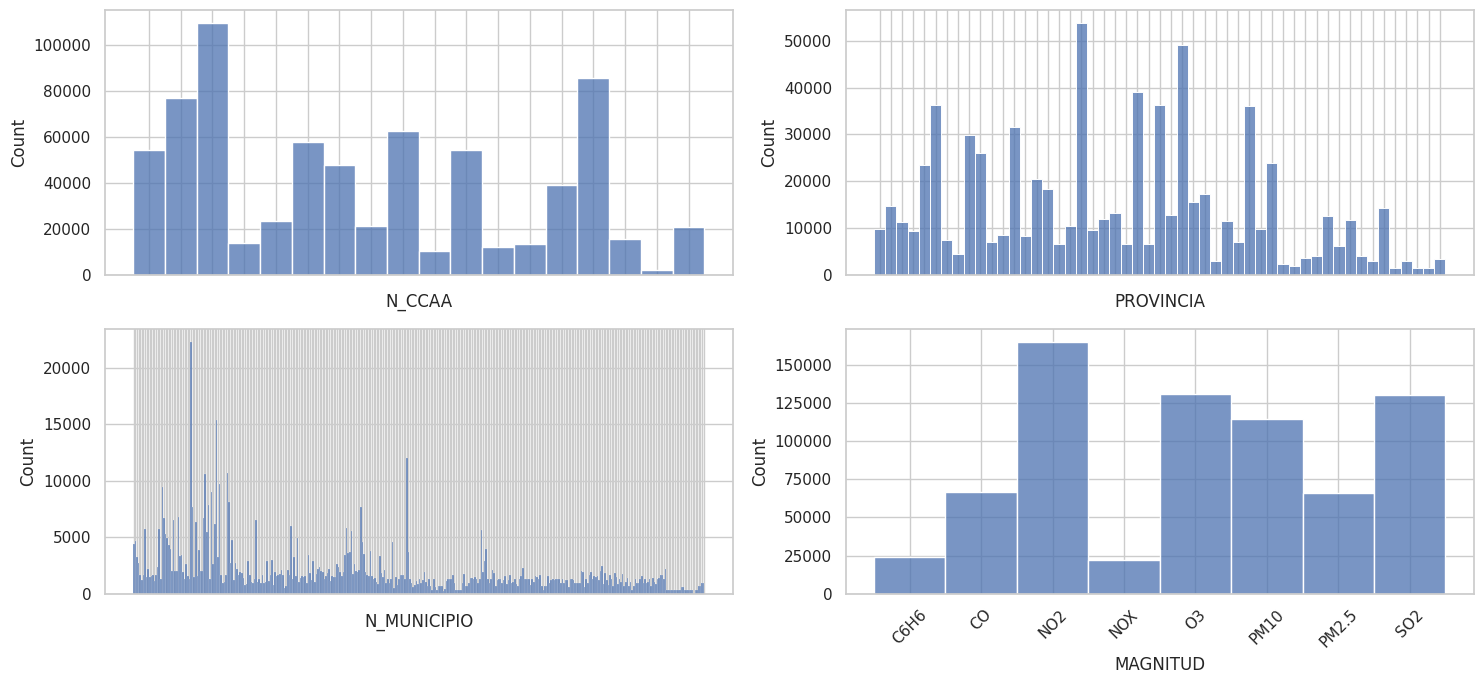

In [7]:
sns.set(style= 'whitegrid')

fig, axis = plt.subplots(2, 2, figsize=(15, 7))

# Histogramas
sns.histplot(ax=axis[0, 0], data=clean_df, x= 'N_CCAA').set_xticklabels([])
sns.histplot(ax=axis[0, 1], data=clean_df, x= 'PROVINCIA').set_xticklabels([])
sns.histplot(ax=axis[1, 0], data=clean_df, x= 'N_MUNICIPIO').set_xticklabels([])
sns.histplot(ax=axis[1, 1], data=clean_df, x= 'MAGNITUD')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

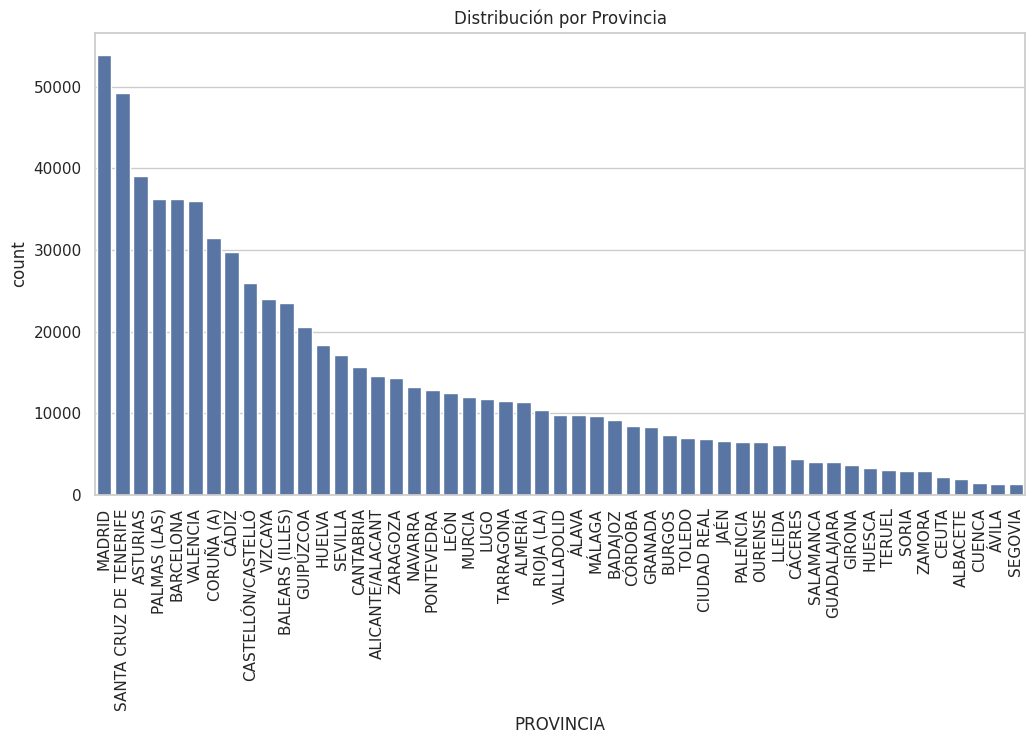

In [8]:
sns.set(style= 'whitegrid')
plt.figure(figsize=(12, 6))

# Suponiendo que clean_df es tu DataFrame y tiene una columna 'PROVINCIA'
sns.countplot(data=clean_df, x= 'PROVINCIA', order = clean_df['PROVINCIA'].value_counts().index)

plt.title('Distribución por Provincia')
plt.xticks(rotation=90)
plt.show()

In [9]:
clean_df.describe()

,ESTACION,LATITUD,LONGITUD,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
count,719282.000000,715747.000000,715747.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000
mean,32.388329,39.161508,-4.714866,17.067012,16.515271,16.074614,15.785590,15.766742,16.156043,17.018112,18.118130,19.069058,19.871931,20.561706,21.065981,21.345421,21.473050,21.549333,21.613501,21.646578,21.603703,21.416290,20.968182,20.293110,19.437662,18.556998,17.745090
std,149.922533,4.521039,5.031532,25.985205,25.327286,24.575764,23.991207,23.639544,23.473510,23.808834,24.860229,26.251565,27.771074,29.224773,30.592692,31.688461,32.505672,33.184788,33.393461,33.727106,33.962276,33.278152,32.218429,31.342378,30.038861,28.461359,27.069425
min,1.000000,27.772600,-17.921670,-0.131800,0.000000,0.000000,0.000000,0.000000,0.000000,-0.011900,0.000000,0.000000,0.000000,-0.012400,0.000000,0.000000,-0.006800,0.000000,-0.075800,-0.155000,0.000000,0.000000,-0.070400,-0.291300,-0.185000,0.000000,0.000000
25%,1.000000,37.555020,-6.395000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.200000,2.700000,2.500000,2.082500,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.056250,2.300000,2.200000,2.000000,2.000000,2.000000
50%,4.000000,40.416670,-3.808610,7.000000,6.200000,6.000000,6.000000,7.000000,7.000000,8.000000,8.700000,9.000000,8.100000,8.000000,7.300000,7.000000,7.000000,6.600000,7.000000,7.000000,8.000000,8.000000,8.400000,8.100000,8.000000,7.900000,7.000000
75%,11.000000,42.457800,-1.100830,21.000000,20.000000,19.040000,19.000000,20.000000,21.000000,23.230000,25.000000,26.000000,26.000000,26.000000,25.270000,25.000000,24.000000,23.300000,24.000000,25.000000,26.000000,27.000000,28.000000,27.000000,26.000000,24.000000,23.000000
max,999.000000,43.686270,4.323890,1305.000000,1218.000000,1210.000000,1210.000000,1963.000000,2090.000000,1938.000000,2418.440000,3607.060000,3435.050000,2892.240000,2672.850000,2408.140000,1897.260000,1790.000000,1984.810000,2169.000000,2517.000000,2296.000000,1985.000000,2342.220000,2778.940000,2109.440000,1628.430000


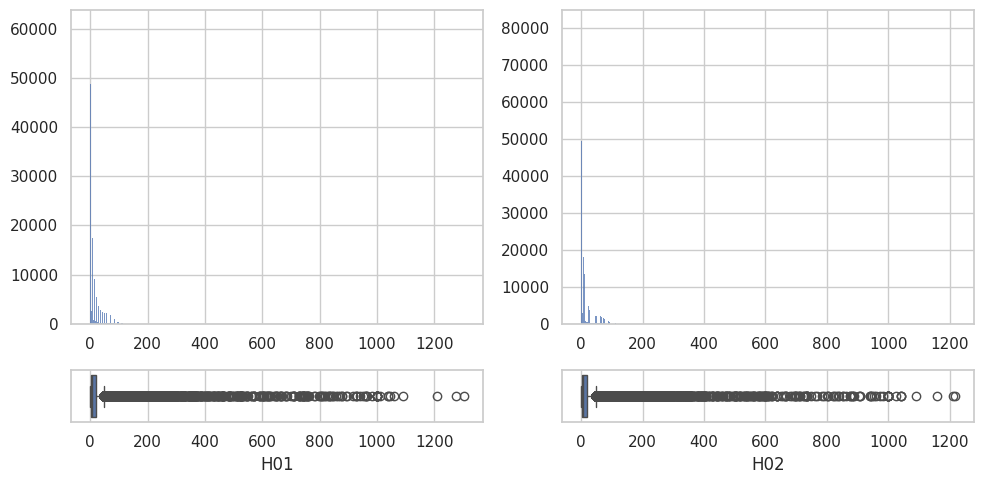

In [10]:
fig, axis = plt.subplots(2, 2, figsize = (10, 5), gridspec_kw={'height_ratios': [6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = clean_df, x = 'H01').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 0], data = clean_df, x = 'H01')
sns.histplot(ax = axis[0, 1], data = clean_df, x = 'H02').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = clean_df, x = 'H02')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
# Lista de columnas de las cuales quieres calcular la media
columnas_h = [col for col in clean_df.columns if col.startswith('H')]

# Calcular la media de esas columnas para cada fila
clean_df['Media_Horaria'] = clean_df[columnas_h].mean(axis=1)

In [12]:
clean_df

,FECHA,N_CCAA,PROVINCIA,N_MUNICIPIO,ESTACION,MAGNITUD,LATITUD,LONGITUD,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24,Media_Horaria
0,2022-01-04,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.16,0.16,0.18,0.18,0.14,0.15,0.22,0.18,0.16,0.18,0.18,0.13,0.17,0.11,0.17,0.18,0.19,0.25,0.25,0.28,0.25,0.20,0.20,0.22,0.187083
1,2022-01-05,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.23,0.26,0.22,0.20,0.21,0.23,0.28,0.31,0.34,0.40,0.35,0.29,0.27,0.30,0.48,0.33,0.45,0.58,0.57,0.51,0.51,0.51,0.48,0.41,0.363333
2,2022-01-06,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.36,0.31,0.32,0.33,0.32,0.33,0.33,0.37,0.54,0.45,0.37,0.32,0.30,0.28,0.30,0.26,0.29,0.36,0.43,0.32,0.32,0.30,0.30,0.28,0.337083
3,2022-01-07,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.25,0.24,0.25,0.26,0.32,0.32,0.28,0.25,0.30,0.27,0.30,0.39,0.28,0.23,0.28,0.29,0.28,0.32,0.31,0.23,0.25,0.29,0.29,0.28,0.281667
4,2022-01-08,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.25,0.25,0.23,0.23,0.32,0.29,0.23,0.28,0.55,0.34,0.36,0.28,0.27,0.27,0.25,0.20,0.23,0.25,0.25,0.23,0.20,0.22,0.22,0.19,0.266250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719277,2022-12-13,CEUTA,CEUTA,CEUTA,1,SO2,35.8930,-5.3147,1.53,1.33,1.58,1.41,1.43,2.88,1.76,1.51,1.42,1.44,1.55,1.41,1.65,1.88,2.22,2.43,3.32,6.62,19.11,17.15,8.29,29.35,24.51,24.16,6.664167
719278,2022-12-16,CEUTA,CEUTA,CEUTA,1,SO2,35.8930,-5.3147,1.64,1.50,1.47,1.44,1.58,1.38,1.12,1.22,1.46,1.18,1.37,2.75,8.84,15.18,15.03,25.54,12.58,38.78,17.84,8.01,11.66,3.28,5.70,5.62,7.757083
719279,2022-12-25,CEUTA,CEUTA,CEUTA,1,SO2,35.8930,-5.3147,2.30,2.15,2.17,2.05,1.82,1.74,1.85,2.48,2.71,3.53,3.34,2.98,2.99,2.44,2.72,2.27,2.07,2.00,1.79,1.65,1.68,1.39,1.30,1.28,2.195833
719280,2022-12-26,CEUTA,CEUTA,CEUTA,1,SO2,35.8930,-5.3147,1.40,1.22,1.22,1.11,1.04,1.16,1.15,1.23,1.18,1.43,1.65,1.91,2.09,2.99,3.31,3.77,2.82,2.47,2.79,2.77,2.66,2.51,2.42,2.52,2.034167


In [18]:
clean_df[(clean_df['MAGNITUD'] == 'SO2') & (clean_df['Media_Horaria'] >= 60)]

,FECHA,N_CCAA,PROVINCIA,N_MUNICIPIO,ESTACION,MAGNITUD,LATITUD,LONGITUD,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24,Media_Horaria,Peligrosidad
619304,2022-09-18,ANDALUCÍA,CÁDIZ,SAN ROQUE,7,SO2,36.18210,-5.41141,517.0,316.0,44.0,15.0,91.0,130.0,192.0,201.0,74.0,36.0,19.0,53.0,60.0,116.0,91.0,142.0,115.0,146.0,57.0,110.0,102.0,19.0,6.0,17.0,111.208333,alta
620815,2022-12-17,COMUNIDAD VALENCIANA,CASTELLÓN/CASTELLÓ,ALMAZORA/ALMASSORA,7,SO2,39.94528,-0.05639,132.0,161.0,130.0,141.0,171.0,69.0,111.0,105.0,109.0,115.0,41.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,7.0,42.0,131.0,62.333333,alta
620839,2022-12-19,COMUNIDAD VALENCIANA,CASTELLÓN/CASTELLÓ,ALMAZORA/ALMASSORA,7,SO2,39.94528,-0.05639,115.0,62.0,49.0,97.0,159.0,151.0,131.0,130.0,49.0,33.0,27.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,43.0,63.0,94.0,133.0,106.0,61.125000,alta
625481,2022-01-13,CASTILLA-LA MANCHA,CIUDAD REAL,PUERTOLLANO,15,SO2,38.68200,-4.08860,9.0,9.0,9.0,8.0,8.0,7.0,9.0,7.0,7.0,11.0,583.0,292.0,227.0,149.0,17.0,9.0,10.0,8.0,14.0,15.0,9.0,13.0,9.0,8.0,60.291667,alta
655050,2022-10-21,GALICIA,LUGO,OUROL,4,SO2,42.71528,-7.44944,167.0,145.0,113.0,34.0,42.0,75.0,108.0,93.0,104.0,120.0,79.0,60.0,25.0,14.0,47.0,23.0,11.0,47.0,40.0,36.0,83.0,108.0,139.0,92.0,75.208333,alta
655059,2022-11-02,GALICIA,LUGO,OUROL,4,SO2,42.71528,-7.44944,9.0,48.0,105.0,27.0,12.0,10.0,8.0,7.0,6.0,16.0,87.0,88.0,76.0,153.0,78.0,67.0,83.0,27.0,48.0,85.0,145.0,102.0,82.0,134.0,62.625000,alta
655062,2022-11-05,GALICIA,LUGO,OUROL,4,SO2,42.71528,-7.44944,4.0,5.0,39.0,234.0,101.0,83.0,123.0,132.0,141.0,116.0,138.0,138.0,131.0,118.0,140.0,44.0,57.0,31.0,37.0,16.0,16.0,14.0,28.0,96.0,82.583333,alta
655066,2022-11-13,GALICIA,LUGO,OUROL,4,SO2,42.71528,-7.44944,11.0,12.0,15.0,20.0,38.0,87.0,51.0,231.0,224.0,138.0,64.0,25.0,40.0,69.0,119.0,52.0,74.0,23.0,30.0,18.0,48.0,29.0,18.0,15.0,60.458333,alta
655079,2022-11-26,GALICIA,LUGO,OUROL,4,SO2,42.71528,-7.44944,29.0,164.0,210.0,147.0,95.0,190.0,88.0,24.0,126.0,19.0,22.0,153.0,102.0,170.0,129.0,263.0,91.0,137.0,130.0,149.0,207.0,168.0,137.0,167.0,129.875000,alta
655091,2022-12-14,GALICIA,LUGO,OUROL,4,SO2,42.71528,-7.44944,51.0,36.0,46.0,25.0,83.0,44.0,114.0,91.0,66.0,93.0,83.0,47.0,107.0,105.0,78.0,29.0,30.0,93.0,28.0,68.0,100.0,49.0,29.0,28.0,63.458333,alta


**Voy a buscar los valores de los contaminantes a ver que se puede hacer.**
- jhsadj

In [14]:
# Función para clasificar los valores de peligrosidad de cada contaminante
def clasificar_peligrosidad(valor, umbrales):
    if valor < umbrales['bajo']:
        return 'baja'
    elif valor < umbrales['alto']:
        return 'media'
    else:
        return 'alta'

# Aplicar la función a cada fila del DataFrame
def clasificar_fila(row):
    contaminante = row['MAGNITUD']
    valor = row['Media_Horaria']
    if contaminante in umbrales_peligrosidad:
        return clasificar_peligrosidad(valor, umbrales_peligrosidad[contaminante])

# Supongamos que estos son tus umbrales de peligrosidad definidos para 8 contaminantes
umbrales_peligrosidad = {
    'SO2': {'bajo': 20, 'alto': 50},
    'CO': {'bajo': 5, 'alto': 15},
    'NO': {'bajo': 30, 'alto': 60},
    'NO2': {'bajo': 40, 'alto': 80},
    'PM2.5': {'bajo': 12, 'alto': 35},
    'PM10': {'bajo': 20, 'alto': 50}, 
    'NOX': {'bajo': 50, 'alto': 100},
    'O3': {'bajo': 30, 'alto': 70}
}

# Crear una nueva columna con la clasificación de peligrosidad
clean_df['Peligrosidad'] = clean_df.apply(clasificar_fila, axis=1)

clean_df

,FECHA,N_CCAA,PROVINCIA,N_MUNICIPIO,ESTACION,MAGNITUD,LATITUD,LONGITUD,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24,Media_Horaria,Peligrosidad
0,2022-01-04,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.16,0.16,0.18,0.18,0.14,0.15,0.22,0.18,0.16,0.18,0.18,0.13,0.17,0.11,0.17,0.18,0.19,0.25,0.25,0.28,0.25,0.20,0.20,0.22,0.187083,None
1,2022-01-05,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.23,0.26,0.22,0.20,0.21,0.23,0.28,0.31,0.34,0.40,0.35,0.29,0.27,0.30,0.48,0.33,0.45,0.58,0.57,0.51,0.51,0.51,0.48,0.41,0.363333,None
2,2022-01-06,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.36,0.31,0.32,0.33,0.32,0.33,0.33,0.37,0.54,0.45,0.37,0.32,0.30,0.28,0.30,0.26,0.29,0.36,0.43,0.32,0.32,0.30,0.30,0.28,0.337083,None
3,2022-01-07,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.25,0.24,0.25,0.26,0.32,0.32,0.28,0.25,0.30,0.27,0.30,0.39,0.28,0.23,0.28,0.29,0.28,0.32,0.31,0.23,0.25,0.29,0.29,0.28,0.281667,None
4,2022-01-08,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.25,0.25,0.23,0.23,0.32,0.29,0.23,0.28,0.55,0.34,0.36,0.28,0.27,0.27,0.25,0.20,0.23,0.25,0.25,0.23,0.20,0.22,0.22,0.19,0.266250,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719277,2022-12-13,CEUTA,CEUTA,CEUTA,1,SO2,35.8930,-5.3147,1.53,1.33,1.58,1.41,1.43,2.88,1.76,1.51,1.42,1.44,1.55,1.41,1.65,1.88,2.22,2.43,3.32,6.62,19.11,17.15,8.29,29.35,24.51,24.16,6.664167,baja
719278,2022-12-16,CEUTA,CEUTA,CEUTA,1,SO2,35.8930,-5.3147,1.64,1.50,1.47,1.44,1.58,1.38,1.12,1.22,1.46,1.18,1.37,2.75,8.84,15.18,15.03,25.54,12.58,38.78,17.84,8.01,11.66,3.28,5.70,5.62,7.757083,baja
719279,2022-12-25,CEUTA,CEUTA,CEUTA,1,SO2,35.8930,-5.3147,2.30,2.15,2.17,2.05,1.82,1.74,1.85,2.48,2.71,3.53,3.34,2.98,2.99,2.44,2.72,2.27,2.07,2.00,1.79,1.65,1.68,1.39,1.30,1.28,2.195833,baja
719280,2022-12-26,CEUTA,CEUTA,CEUTA,1,SO2,35.8930,-5.3147,1.40,1.22,1.22,1.11,1.04,1.16,1.15,1.23,1.18,1.43,1.65,1.91,2.09,2.99,3.31,3.77,2.82,2.47,2.79,2.77,2.66,2.51,2.42,2.52,2.034167,baja
